In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [7]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y=data[['전국 관객수']]

In [8]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-8-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-8-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [12]:
#다중선형회귀
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

linear=LinearRegression()
linear1=LinearRegression()
linear2=LinearRegression()

linear.fit(X_train, y_train)
linear1.fit(X_train1,y_train1)
linear2.fit(X_train2,y_train2)

y_pred=linear.predict(X_test)
y_pred1=linear1.predict(X_test1)
y_pred2=linear2.predict(X_test2)

#예측값이 음수인 경우 0으로 수정
for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1=np.sqrt(mean_squared_error(y_test2,y_pred1))
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))

print("학습 데이터 점수 : {}".format(linear.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(linear.score(X_test,y_test)))
print("rmse : {}".format(rmse))

print("학습 데이터 점수 : {}".format(linear1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(linear1.score(X_test1,y_test1)))
print("rmse1 : {}".format(rmse1))

print("학습 데이터 점수 : {}".format(linear2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(linear2.score(X_test2,y_test2)))
print("rmse2 : {}".format(rmse2))

학습 데이터 점수 : 0.6353533137412636
평가 데이터 점수 : 0.5521029268667628
rmse : 1373032.2504501443
학습 데이터 점수 : 0.6159807883189966
평가 데이터 점수 : 0.5626032164255841
rmse1 : 1356567.6539990727
학습 데이터 점수 : 0.619219319653908
평가 데이터 점수 : 0.5478898704392949
rmse2 : 1376155.8823429614


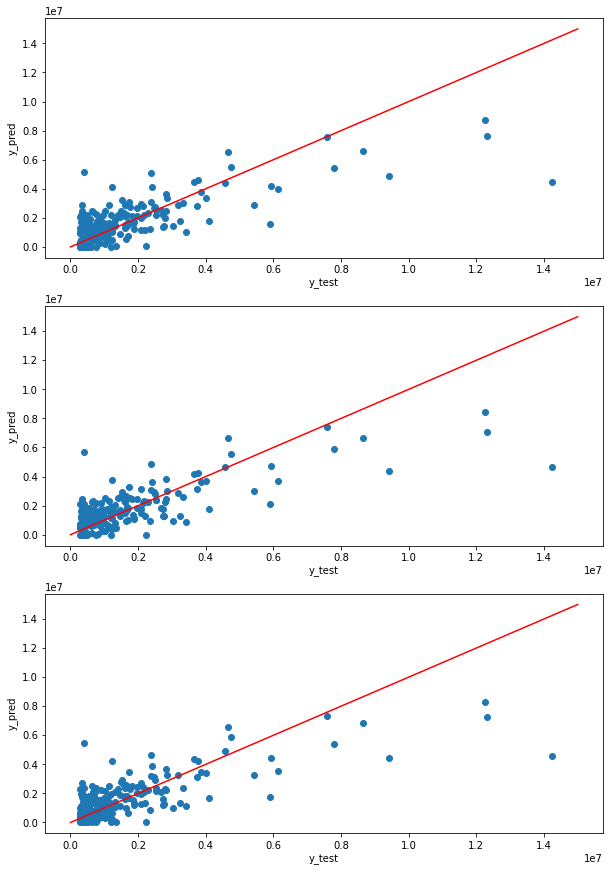

In [16]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.plot(n,n,color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.plot(n,n,color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.plot(n,n,color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [17]:
#다항선형회귀(2차식)
linear=LinearRegression()
linear1=LinearRegression()
linear2=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

for i in range(1,5):
    poly_features = PolynomialFeatures(degree=i)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    X_train_poly1 = poly_features.fit_transform(X_train1)
    X_test_poly1 = poly_features.fit_transform(X_test1)
    X_train_poly2 = poly_features.fit_transform(X_train2)
    X_test_poly2 = poly_features.fit_transform(X_test2)
    linear.fit(X_train_poly,y_train)
    linear1.fit(X_train_poly1,y_train1)
    linear2.fit(X_train_poly2,y_train2)
    print("degree={}".format(i))
    print("학습 데이터 점수 : {}".format(linear.score(X_train_poly,y_train)))
    print("평가 데이터 점수 : {}".format(linear.score(X_test_poly,y_test)))

    print("학습 데이터 점수 : {}".format(linear1.score(X_train_poly1,y_train1)))
    print("평가 데이터 점수 : {}".format(linear1.score(X_test_poly1,y_test1)))

    print("학습 데이터 점수 : {}".format(linear2.score(X_train_poly2,y_train2)))
    print("평가 데이터 점수 : {}".format(linear2.score(X_test_poly2,y_test2)))

degree=1
학습 데이터 점수 : 0.6353533137412636
평가 데이터 점수 : 0.5521029268667628
학습 데이터 점수 : 0.6159807883189966
평가 데이터 점수 : 0.5626032164255841
학습 데이터 점수 : 0.619219319653908
평가 데이터 점수 : 0.5478898704392953
degree=2
학습 데이터 점수 : 0.8218357969062733
평가 데이터 점수 : -4.486817340508682e+22
학습 데이터 점수 : 0.6771837050877234
평가 데이터 점수 : 0.6154553146015471
학습 데이터 점수 : 0.6816563724487494
평가 데이터 점수 : 0.6161351507469739
degree=3
학습 데이터 점수 : 0.9949758768679119
평가 데이터 점수 : -4.434486722586218e+18
학습 데이터 점수 : -3.478600170479427
평가 데이터 점수 : -6.093170417493383
학습 데이터 점수 : 0.7288213034295796
평가 데이터 점수 : 0.5445262557200932
degree=4
학습 데이터 점수 : 1.0
평가 데이터 점수 : -42.674113041136536
학습 데이터 점수 : 0.5150131013295061
평가 데이터 점수 : -35.06562994871827
학습 데이터 점수 : -6.6822509764535125
평가 데이터 점수 : -85.7457101337318
